<a href="https://colab.research.google.com/github/JuliaOrtheden/COVID19-research-challenge/blob/master/DiseaseSpreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
from enum import Enum
import random
import numpy
from matplotlib import colors


In [ ]:
class Grid:
  def __init__ (self, x, y):
    self.y = y
    self.x = x
    self.grid = [[[] for j in range(y)] for i in range(x)]

  def update_position(self, agent, toX, toY):
    self.grid[agent.current_x][agent.current_y].remove(agent)
    self.grid[toX][toY].append(agent)

  def __getitem__(self, index):
    return self.grid[index]

  def __str__(self):
    return str(self.grid)



In [ ]:
class Agent:
  def __init__ (self, current_state, current_y, current_x, move_prob, grid):
    self.current_state = current_state
    self.current_y = current_y
    self.current_x = current_x
    self.move_prob = move_prob
    self.grid = grid
    self.grid[self.current_x][self.current_y].append(self)


  def is_valid_position(self,x,y):
    return x > -1 and x < self.grid.x and y > -1 and y < self.grid.y

  def move(self):
    r = random.random()
    if r < self.move_prob:
      move_int = random.randint(1,4)
      
      if move_int == 1:
        self.move_left()
        print("move left")
        print(str(self.current_x))
        print(str(self.current_y))
      if move_int == 2:
        self.move_right()
        print("move right")
        print(str(self.current_x))
        print(str(self.current_y))
      if move_int == 3:
        self.move_down()
        print("move down")
        print(str(self.current_x))
        print(str(self.current_y))
      if move_int == 4:
        self.move_up()
        print("move up")
        print(str(self.current_x))
        print(str(self.current_y))

  def move_left(self):
    grid = self.grid
    toX = self.current_x 
    toY = self.current_y - 1
    if self.is_valid_position(toX,toY): 
      grid.update_position(self, toX, toY)
      self.current_x = toX
      self.current_y = toY
    else:
      print("This is not a possible move")

  def move_right(self):
    grid = self.grid
    toX = self.current_x 
    toY = self.current_y + 1  
    if self.is_valid_position(toX,toY):
      grid.update_position(self, toX, toY)
      self.current_x = toX
      self.current_y = toY
    else:
      print("This is not a possible move")

  def move_up(self):
    grid = self.grid
    toX = self.current_x - 1
    toY = self.current_y  
    if self.is_valid_position(toX,toY):
      grid.update_position(self, toX, toY)
      self.current_x = toX
      self.current_y = toY
    else:
      print("This is not a possible move")

  def move_down(self):
    grid = self.grid
    toX = self.current_x + 1
    toY = self.current_y
    if self.is_valid_position(toX,toY):
      grid.update_position(self, toX, toY)
      self.current_x = toX
      self.current_y = toY
    else:
      print("This is not a possible move")

  def __str__(self):
    return str(self.current_state)
    

In [ ]:
class state(Enum):
  susceptible = "s"
  infected = "i"
  recovered = "r" 

  def __str__(self):
    return str(self.value)


In [ ]:
grid1 = Grid(5,5)

agent1 = Agent(state.infected, 0, 0, 1, grid1)
print(str(agent1.grid))
agent1.move_right()
print(str(agent1.grid))
agent1.is_valid_position(99,0)
agent1.move_up()
print(str(agent1.grid))
agent1.move()
print(str(agent1.grid))

print(str(agent1))




[[[<__main__.Agent object at 0x7fe4db40b908>], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]
[[[], [<__main__.Agent object at 0x7fe4db40b908>], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]
[[[], [], [], [], []], [[], [<__main__.Agent object at 0x7fe4db40b908>], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]
move down
0
1
[[[], [<__main__.Agent object at 0x7fe4db40b908>], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]
i


This is not a possible move
move left
0
0
This is not a possible move
move up
0
0
move right
0
1
This is not a possible move
move up
0
1
move right
0
2
This is not a possible move
move up
0
2
move down
1
2
move left
1
1
move left
1
0
move down
2
0


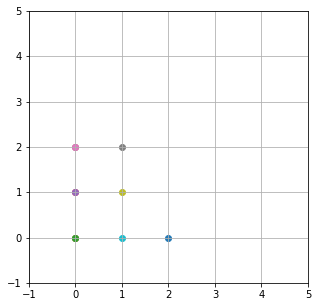

In [ ]:
grid1 = Grid(5,5)

agent1 = Agent(state.infected, 0, 0, 1, grid1)

fig = plt.figure(figsize=(5, 5))
plt.scatter(0,0)
for x in range(0, 10):
  agent1.move()

  
  axes = plt.gca()
  axes.set_xlim([-1,5])
  axes.set_ylim([-1,5])
  plt.scatter(agent1.current_x, agent1.current_y)
  
  
plt.grid()
plt.show()

